<a href="https://colab.research.google.com/github/MOUNIKADONTULA/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_2_Group_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

**Business Context**

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
import missingno as msno

**About Data Set**

**Load the data** 




In [3]:
# Read to CSV
filepath='/content/drive/MyDrive/bike sharing demand prediction/SeoulBikeData.csv'
data=pd.read_csv(filepath,encoding= 'unicode_escape')

In [4]:
# Copy the orignal Data
df=data.copy()

**Shape of the data**

In [5]:
print('Shape of data: ', df.shape)

Shape of data:  (8760, 14)


The provided data consists of over 8760 observations with 14 column variables.

**Look into the first few observations**

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df['Date'].value_counts()

01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64

**Column Data Types**

In [8]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Statistical Details for every column**

Below table provides the statistical details for each column.

In [9]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Data Cleaning**

Missing Data Fields

From the above .info() command, we notice that every column has 8760 (= number of rows) non-null values. This seems to be a very clean set of data and there are no missing data in any of the 'row x columns'.

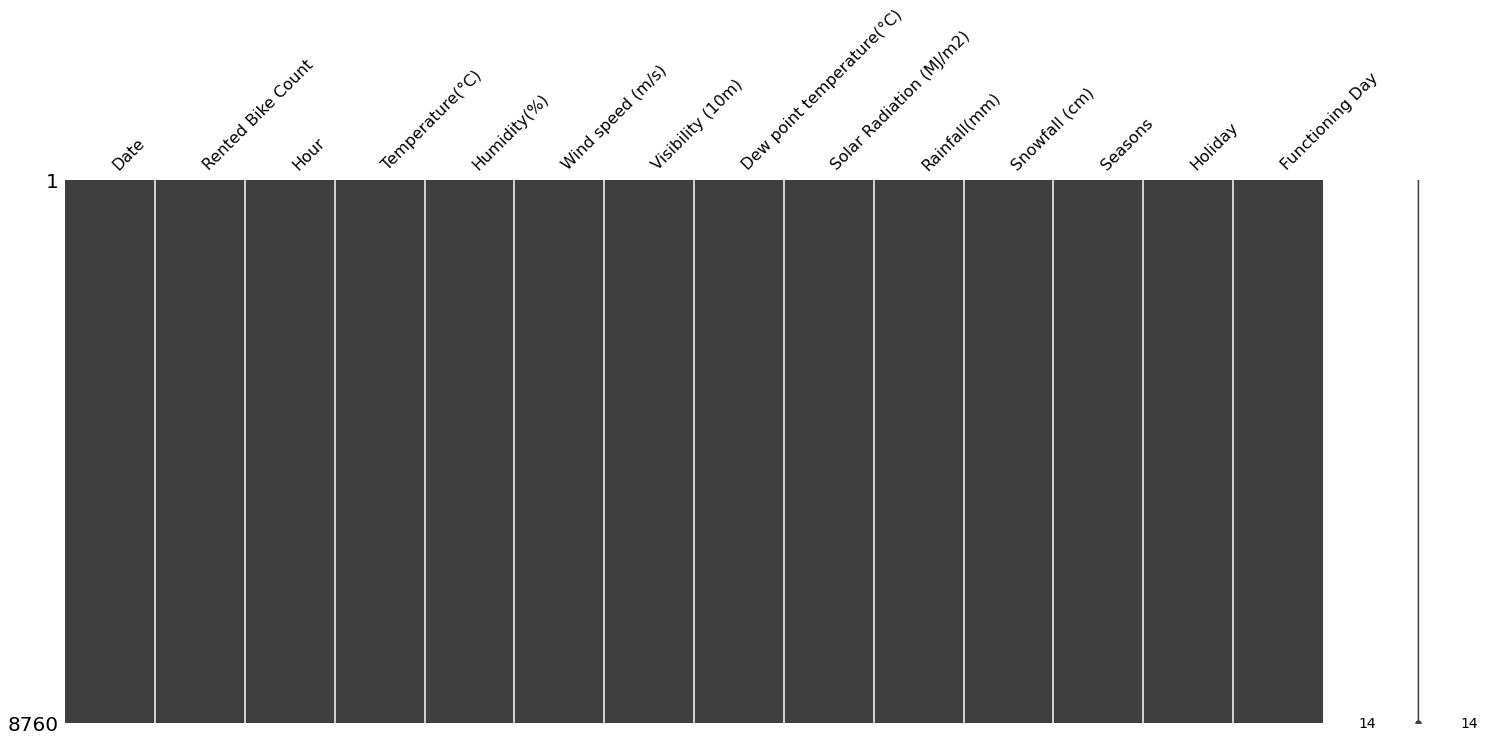

In [10]:
msno.matrix(df)

**Convert the "date" column into 3 different columns i.e "year","month","day"**

In [11]:
import datetime as dt
df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()
#Creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['week']=df['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

In [12]:
# Checking no of years
df['week'].value_counts()

weekday    6264
weekend    2496
Name: week, dtype: int64

In [13]:
# Drop the columns
df=df.drop(columns=['date','day','year'],axis=1)

In [14]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,weekday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,weekday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,weekday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,weekday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,weekday
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,weekday
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12,weekday
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,12,weekday
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,12,weekday
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,12,weekday


So we convert the "date" column into 3 different column i.e "year","month" &"day". The "year" column in our data set is basically contain the 2 unique number contains the details of from **December 2017** to **November 2018** so if we consider this is a one year then we don't need the "year" column so we drop it. 

The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [15]:
#Change the int64 column into catagory column
cols=['Hour','month','week']
for col in cols:
  df[col]=df[col].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   category
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   object  
 12  Holiday                    8760 non-null   object  
 13  Functioning Day            8760 n

## **Handling Null values**

In [17]:
# checking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
week                         0
dtype: int64

**There are no null values in the data**

In [18]:
# checking for duplicate values
df.duplicated().sum()

0

**There are no duplicate values in our data**

In [19]:
# Chnage the colume names
df=df.rename(columns={'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew point temperature',
                                'Solar Radiation (MJ/m2)':'Solar Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning Day'})

**Checking correlation**

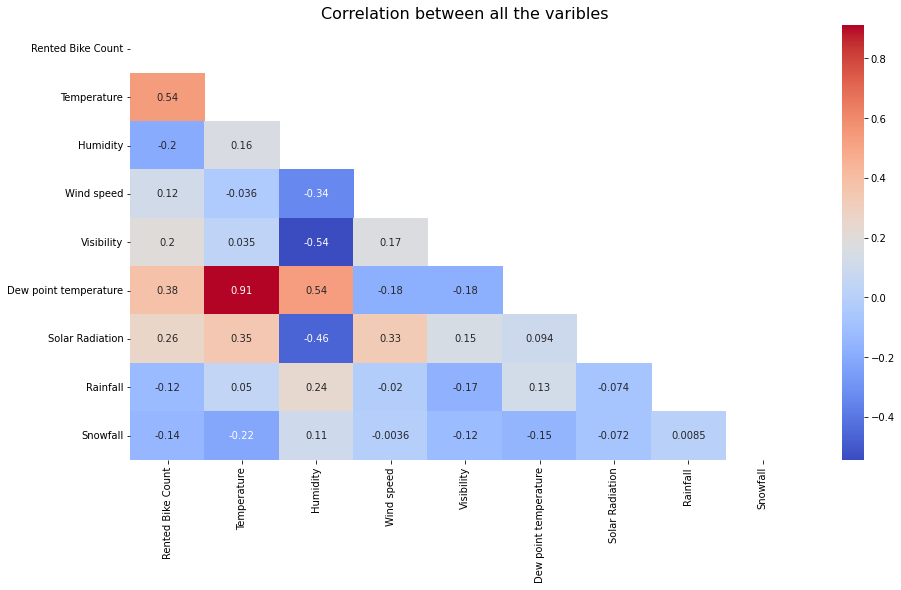

In [20]:
#Heatmap for co-relation in features
plt.figure(figsize=(15,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.title('Correlation between all the varibles', size=16)
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

From the above Heatmap co-relation we can conclude that Temperature and Dew point temperature(°C) has the high correlation.So we drop any one column from it.
It do not affects the outcome of our study.

In [21]:
# Drop dew point temperature
df.drop(columns= ['Dew point temperature'], inplace=True)

**Removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

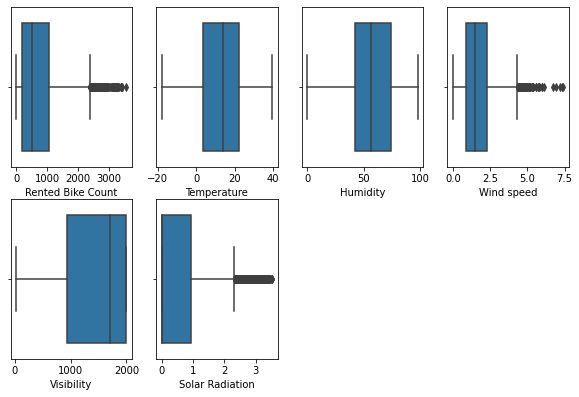

In [22]:
# Looking for outliers 
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in df.describe().columns.to_list() if i not in ['Rainfall','Snowfall']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

In [23]:
# finding the inter-quartile range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count     874.25
Temperature            19.00
Humidity               32.00
Wind speed              1.40
Visibility           1060.00
Solar Radiation         0.93
Rainfall                0.00
Snowfall                0.00
dtype: float64


In [24]:
# Listing the features to remove outliers
features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','week']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Solar Radiation',
 'Rainfall',
 'Snowfall']

In [25]:
# Removing outliers
df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               8760 non-null   object  
 1   Rented Bike Count  8760 non-null   int64   
 2   Hour               8760 non-null   category
 3   Temperature        7078 non-null   float64 
 4   Humidity           7078 non-null   float64 
 5   Wind speed         7078 non-null   float64 
 6   Visibility         7078 non-null   float64 
 7   Solar Radiation    7078 non-null   float64 
 8   Rainfall           7078 non-null   float64 
 9   Snowfall           7078 non-null   float64 
 10  Seasons            8760 non-null   object  
 11  Holiday            8760 non-null   object  
 12  Functioning Day    8760 non-null   object  
 13  month              8760 non-null   category
 14  week               8760 non-null   category
dtypes: category(3), float64(7), int64(1), object(4)
memory 

**Handling Null values after removing outliers**

In [27]:
# Filling null values with mean values
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())
df['Wind speed'] = df['Wind speed'].fillna(df['Wind speed'].mean())
df['Visibility'] = df['Visibility'].fillna(df['Visibility'].mean())
df['Solar Radiation'] = df['Solar Radiation'].fillna(df['Solar Radiation'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Snowfall'] = df['Snowfall'].fillna(df['Snowfall'].mean())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               8760 non-null   object  
 1   Rented Bike Count  8760 non-null   int64   
 2   Hour               8760 non-null   category
 3   Temperature        8760 non-null   float64 
 4   Humidity           8760 non-null   float64 
 5   Wind speed         8760 non-null   float64 
 6   Visibility         8760 non-null   float64 
 7   Solar Radiation    8760 non-null   float64 
 8   Rainfall           8760 non-null   float64 
 9   Snowfall           8760 non-null   float64 
 10  Seasons            8760 non-null   object  
 11  Holiday            8760 non-null   object  
 12  Functioning Day    8760 non-null   object  
 13  month              8760 non-null   category
 14  week               8760 non-null   category
dtypes: category(3), float64(7), int64(1), object(4)
memory 

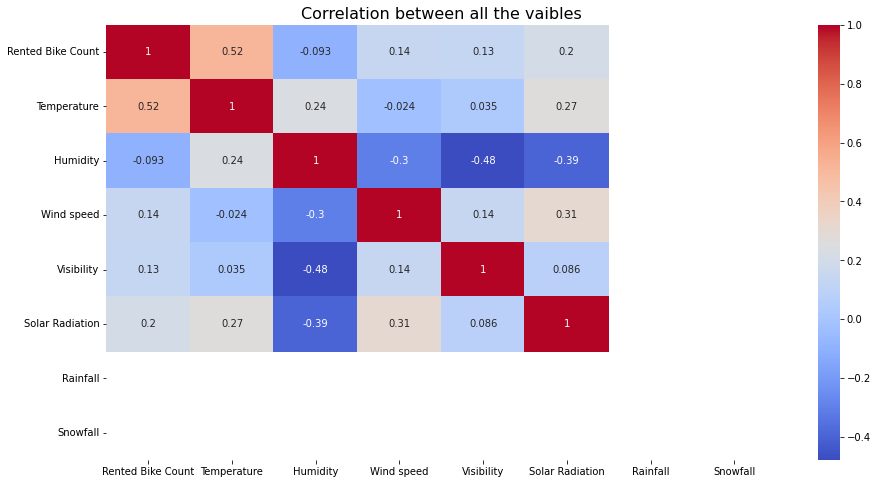

In [29]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

## **Exploratory data analysis (EDA)**
It is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

# **Analysis of Categorical variables**

**Analysis of Rented Bike Count with respect to Month**

[Text(0.5, 1.0, 'Counts of rented bikes by months ')]

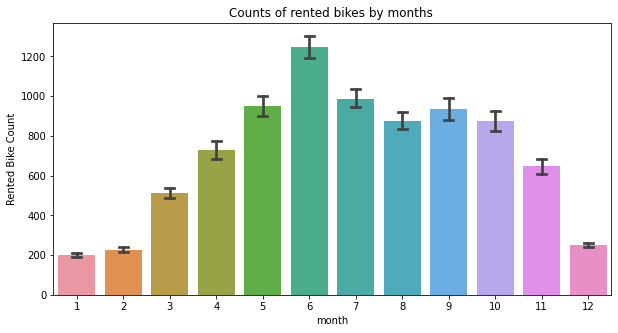

In [30]:
# Anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Counts of rented bikes by months ')

From the above Bar plot we can say that from the 5th month to 10th month  the demand of the rented bike is high as compare to other months.

**Analysis of Rented Bike Count with respect to Week**

[Text(0.5, 1.0, 'Count of rented bikes by weekdays_weekend ')]

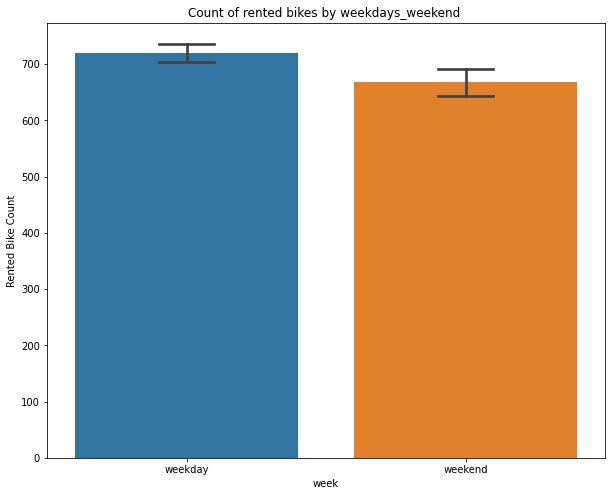

In [31]:
# Week anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='week',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of rented bikes by weekdays_weekend ')

From the above bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office working day

**Analysis of Rented Bike Count with respect to Hour**

[Text(0.5, 1.0, 'Count of rented bikes by weekdays_weekend ')]

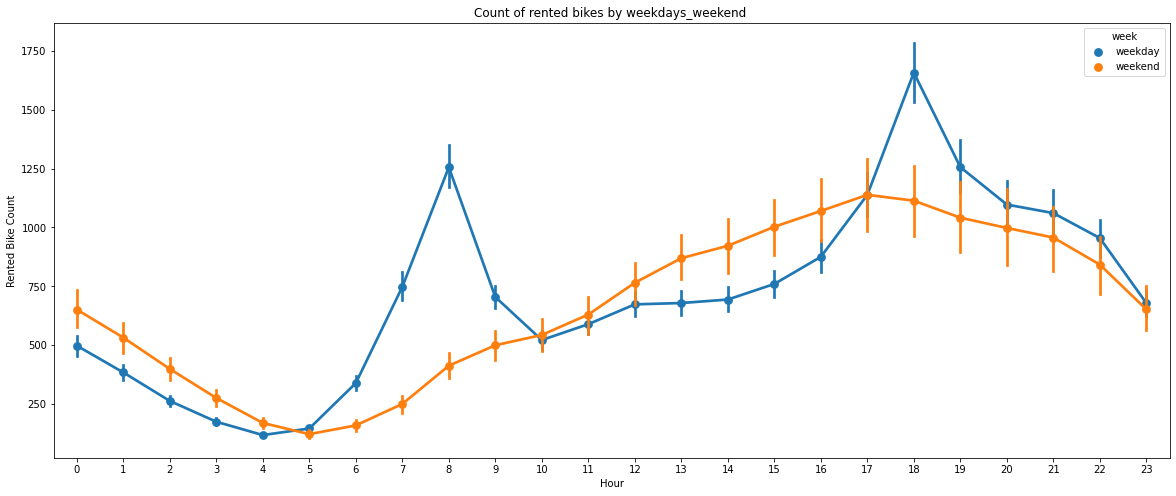

In [32]:
# Hour anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='week',ax=ax)
ax.set(title='Count of rented bikes by weekdays_weekend ')

From the above point plot we can see that Peak Time are 7 am to 9 am and 5 pm to 7 pm and show that demand of rented bikes are very low in the morning hour but in the evening from 4 pm to 8 pm the demand increases.

**Analysis of Rented Bike Count with respect to Functioning day**

[Text(0.5, 1.0, 'Count of Rented bikes by Functioning Day ')]

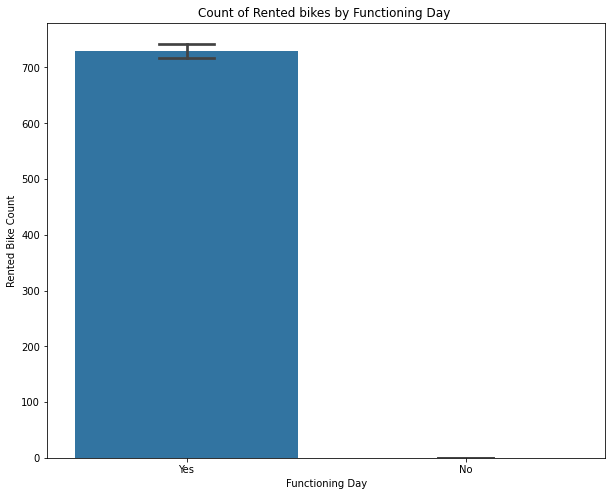

In [33]:
# Functioning Day anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes by Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes by Functioning day hours ')]

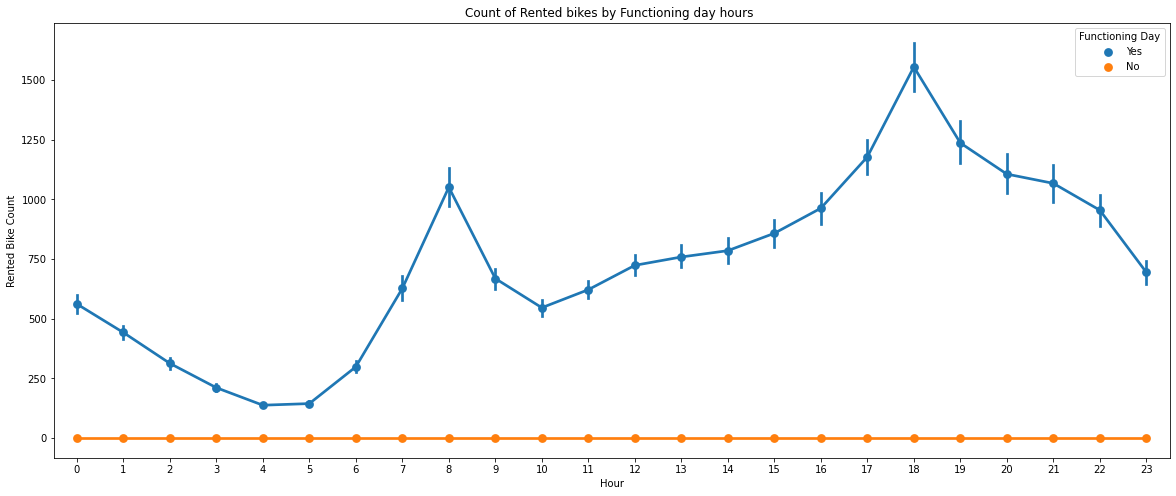

In [34]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes by Functioning day hours ')

The above bar plot and point plot shows the use of rented bike in functioning day or not, and it also shows that, Peoples do n0t use reneted bikes in no functioning day.

**Analysis of Rented Bike Count with respect to Holiday**

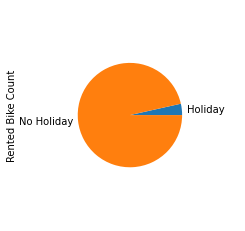

In [35]:
data_per=df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=0.6)

[Text(0.5, 1.0, 'Count of Rented bikes by Hour in Holiday ')]

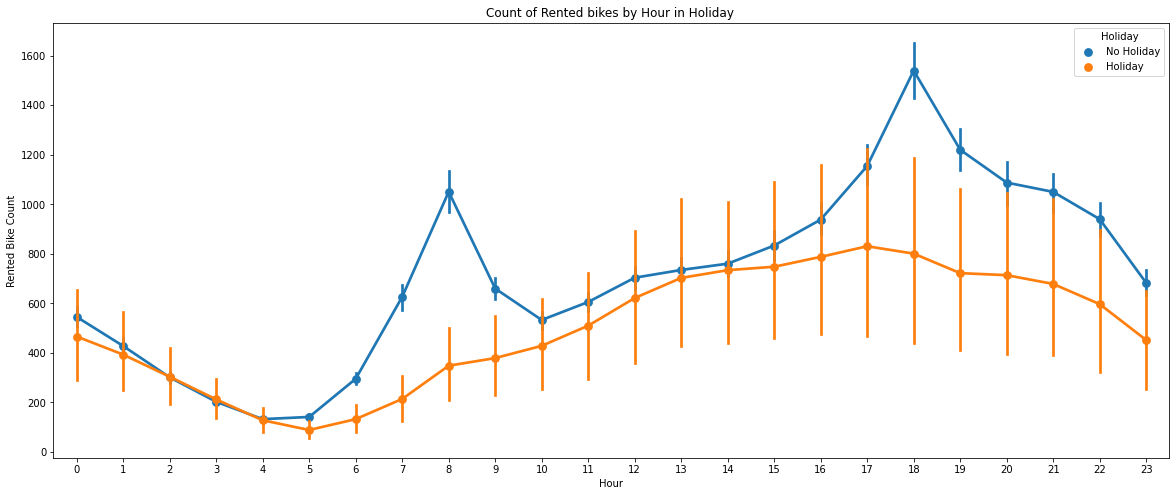

In [36]:
#Holiday Hour anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes by Hour in Holiday ')

The above pie chart and point plot shows the use of rented bike in a holiday, and it also shows that in holiday people uses the rented bike in time from 2pm-8pm.

**Analysis of Rented Bike Count with respect to Seasons**

[Text(0.5, 1.0, 'Count of Rented bikes by Seasons ')]

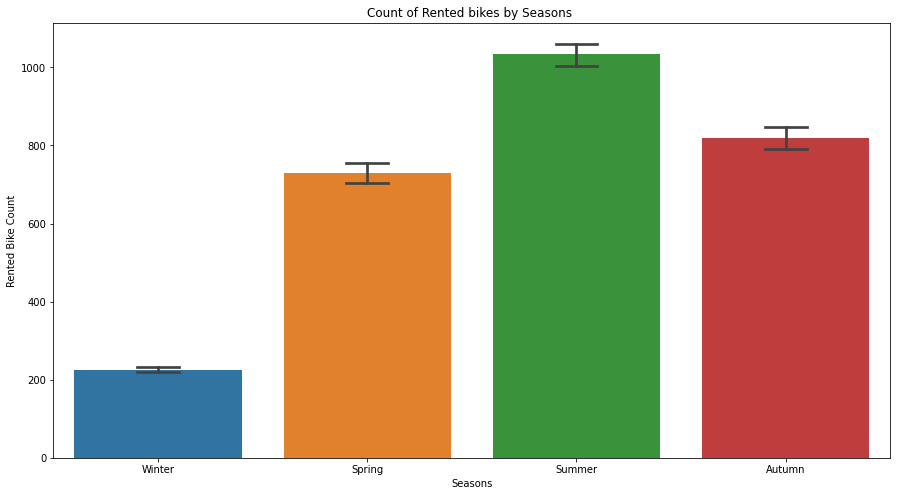

In [37]:
#Seasons anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes by Seasons ')

The above bar plot shows the use of rented bike in in four different seasons, and it also shows that in summer season the use of rented bike is high and in winter season the use of rented bike is very low because of cold and snowfall.

#**Analysis of numerical variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

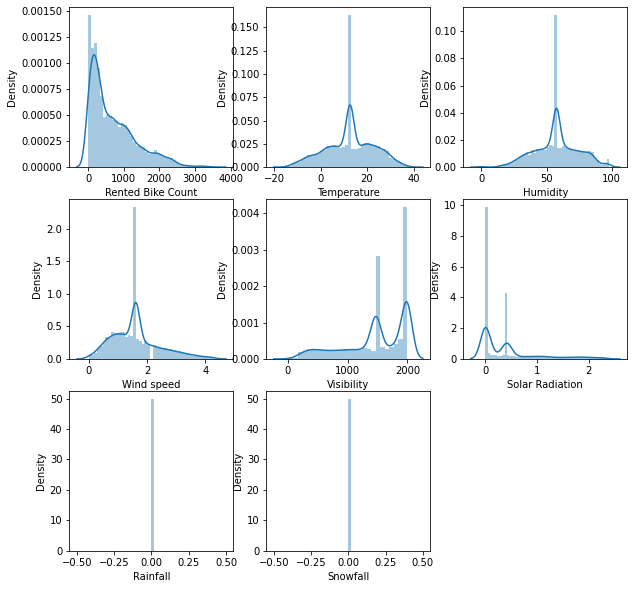

In [38]:
# Create Dataframe for numerical data
numerical_columns=['Rented Bike Count','Temperature','Humidity',	'Wind speed',	'Visibility',	'Solar Radiation'	,'Rainfall'	,'Snowfall']	

# Checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(numerical_columns):
  plt.subplot(3,3,index+1)
  sns.distplot(df[item])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


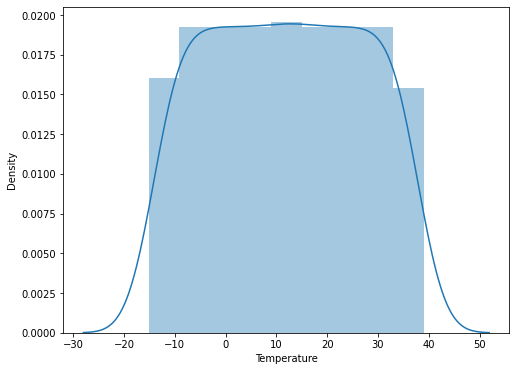

In [39]:
# Creating a dataframe for the count of bikes rented in different temperature
df_temp = pd.DataFrame(df.groupby('Temperature')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

# Plot showing distribution of bike rentals according to temperature intensity
plt.figure(figsize=(8,6))
sns.distplot(df_temp['Temperature'])

Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


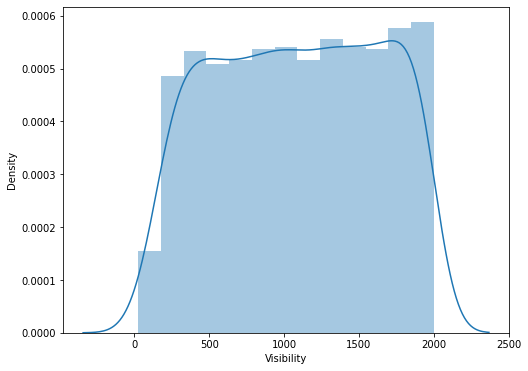

In [40]:
# Creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(df.groupby('Visibility')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

plt.figure(figsize=(8,6))
sns.distplot(df_visi['Visibility'])

Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.

# **One Hot Encoding**

In [41]:
# Creating dummy variables for categorical feature --> Seasons, month, DayOfWeek, year, fuctioning day, holiday

seasons = pd.get_dummies(df['Seasons'])

working_day = pd.get_dummies(df['Holiday'])

F_day = pd.get_dummies(df['Functioning Day'])

month = pd.get_dummies(df['month'])

week_day = pd.get_dummies(df['week'])

In [42]:
# Concat the dataframe with dummy variables
df = pd.concat([df,seasons,working_day,F_day,month,week_day],axis=1)

In [43]:
# Check the datafram
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,...,5,6,7,8,9,10,11,12,weekday,weekend
0,01/12/2017,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,01/12/2017,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,01/12/2017,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,01/12/2017,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,01/12/2017,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [44]:
# droping date because we already extract the date from the data

df.drop(['Date'],axis=1,inplace=True) 

In [45]:
# Drop the columns for which dummy variables were created

df.drop(['Seasons','Holiday','Functioning Day','week','month'],axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented Bike Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   float64 
 4   Wind speed         8760 non-null   float64 
 5   Visibility         8760 non-null   float64 
 6   Solar Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Autumn             8760 non-null   uint8   
 10  Spring             8760 non-null   uint8   
 11  Summer             8760 non-null   uint8   
 12  Winter             8760 non-null   uint8   
 13  No Holiday         8760 non-null   uint8   
 14  No                 8760 non-null   uint8   
 15  Yes                8760 non-null   uint8   
 16  1     

In [47]:
df.isna().sum()

Rented Bike Count    0
Hour                 0
Temperature          0
Humidity             0
Wind speed           0
Visibility           0
Solar Radiation      0
Rainfall             0
Snowfall             0
Autumn               0
Spring               0
Summer               0
Winter               0
No Holiday           0
No                   0
Yes                  0
1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
8                    0
9                    0
10                   0
11                   0
12                   0
weekday              0
weekend              0
dtype: int64

In [48]:
df = df.dropna()

# **Check for multicollinearity**

In [49]:
# function to calculate Multicollinearity

# check the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


              feature   VIF
0   Rented Bike Count  2.22
1                Hour  1.41
2         Temperature  3.97
3            Humidity  2.33
4          Wind speed  1.29
5          Visibility  1.75
6     Solar Radiation  1.62
7            Rainfall   NaN
8            Snowfall   NaN
9              Autumn   inf
10             Spring   inf
11             Summer   inf
12             Winter   inf
13         No Holiday  1.05
14                 No   inf
15                Yes   inf
16                  1   inf
17                  2   inf
18                  3   inf
19                  4   inf
20                  5   inf
21                  6   inf
22                  7   inf
23                  8   inf
24                  9   inf
25                 10   inf
26                 11   inf
27                 12   inf
28            weekday   inf
29            weekend   inf


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented Bike Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   float64 
 4   Wind speed         8760 non-null   float64 
 5   Visibility         8760 non-null   float64 
 6   Solar Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Autumn             8760 non-null   uint8   
 10  Spring             8760 non-null   uint8   
 11  Summer             8760 non-null   uint8   
 12  Winter             8760 non-null   uint8   
 13  No Holiday         8760 non-null   uint8   
 14  No                 8760 non-null   uint8   
 15  Yes                8760 non-null   uint8   
 16  1     

In [51]:
# Drop the NAN VIF data col.
df=df.drop(['Rainfall','Snowfall'],axis=1)

# **Regression Plot**

In [52]:
numerical_columns=['Rented Bike Count','Temperature','Humidity',	'Wind speed',	'Visibility',	'Solar Radiation'	]

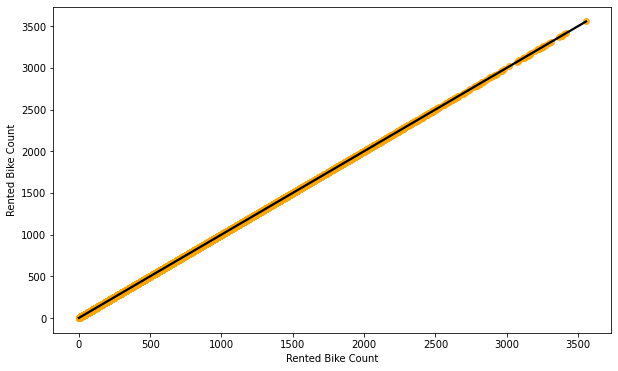

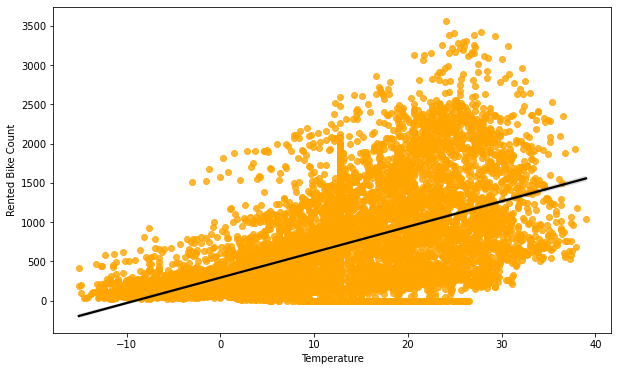

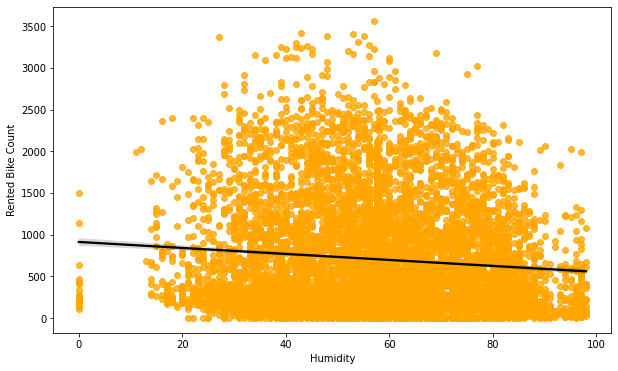

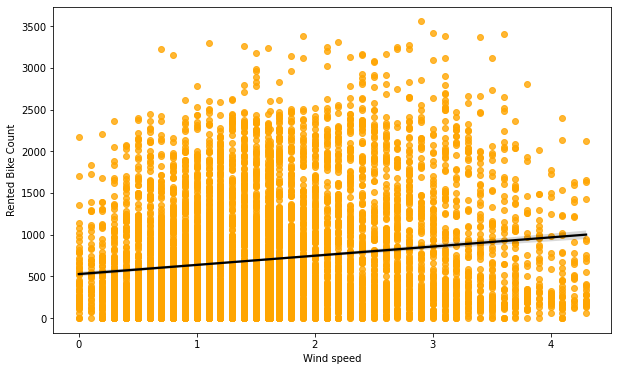

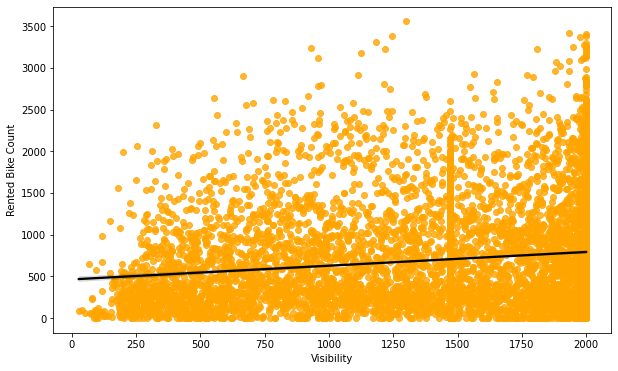

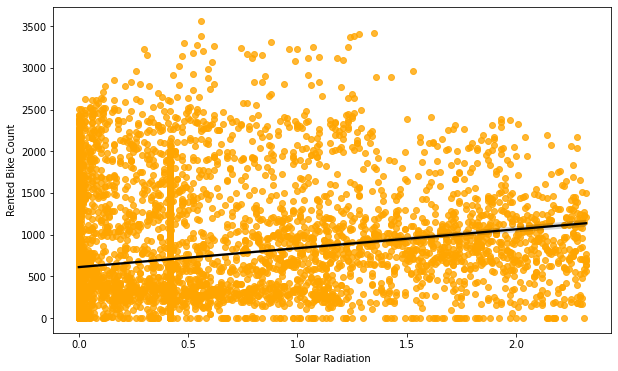

In [53]:
# Printing the regression plot for all the numerical features
for col in numerical_columns:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})


Temperature,solar radiation,windspeed,visibility are positively related to target variable ,the rented bike count increases with increase of these features.

# **X_Train & Y_Train**

In [54]:
#Assign the value in X and Y
X = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])

In [55]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 27)
(2190, 27)


In [56]:
# Standardiz the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# **Linear Regression Model**

**L1 Regularization**

It is also called a lasso regression, adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function.

In [57]:
#Import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [58]:
# Check the score
reg.score(X_train, y_train)

0.6030111076694047

In [59]:
# Check the coefficeint
reg.coef_

array([ 3.75003221e+00,  4.07962345e+00, -2.07879394e+00,  3.79677535e-01,
       -7.97208343e-02, -1.47273584e-01, -2.80663822e+13,  1.70714552e+13,
       -1.85708860e+12,  6.13735841e+12,  6.95521247e-01, -1.43286564e+13,
       -1.43286564e+13, -1.98188847e+11, -1.87511556e+11, -7.16970901e+12,
       -7.12841259e+12, -7.18144504e+12,  4.85630353e+12,  4.94666214e+12,
        4.93041008e+12,  2.13284737e+13,  2.18150688e+13,  2.18327916e+13,
       -1.96600055e+11, -9.21889586e+12, -9.21889586e+12])

In [60]:
# X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [61]:
y_pred_test

array([ 1.86572387e+11, -2.84534894e+12,  9.60839087e+10, ...,
       -4.11052586e+11,  4.85731018e+12, -1.72901634e+11])

**Calculating MSE,RMSE,MAE,R2 and Adjusted R2**

In [62]:
# Import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 61.132589005575994
RMSE : 7.818733209771004
MAE : 5.911752830176522
R2 : 0.6030111076694047
Adjusted R2 : 0.5980533370436295


**L2 Regularization**

It is also called a ridge regression, adds the “squared magnitude” of the coefficient as the penalty term to the loss function.

In [63]:
# Import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [64]:
#Fit the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [65]:
# Check the score
ridge.score(X_train, y_train)

0.6030365859024547

In [66]:
# X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [67]:
# Evaluating metrics
# Import the packages
from sklearn.metrics import mean_squared_error
# Calculate MSE
MSE  = mean_squared_error(y_test,y_pred_test_ridge)
print("MSE :" , MSE)
# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
# Calculate r2 and adjusted r2
r2_ridge_test = r2_score(y_test,y_pred_test_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60.83384712272395
RMSE : 7.799605574817482
R2 : 0.6148937632653055
Adjusted R2 :  0.6100843884309686


# **linear regression with elastic net**

In [68]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [69]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [70]:
#check the score
elasticnet.score(X_train, y_train)

0.6014721692250583

In [71]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [72]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 61.369571181250464
RMSE : 7.8338733191985215
MAE : 5.93382066577593
R2 : 0.6014721692250583


# **Decision tree with gridsearch cv**

In [73]:
# Tunning the hyper parameters with GridSearchCV
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
Y_pred_train =regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}
regressor_gs_cv =GridSearchCV(regressor ,param,scoring='r2',cv=5)
regressor_gs_cv.fit(X_train,y_train)
#looking at the best estimator
regressor_gs_cv.best_estimator_
#checking the score with best parameters
DT_with_cv = regressor_gs_cv.score(X_test,y_test)
DT_with_cv
print(f'The r2 score of decision tree is {r2_score(Y_pred_test,y_test)}')

print(f'the r2 score of decision tree with hyper perameteres tunning is {regressor_gs_cv.score(X_test,y_test)} ')

The r2 score of decision tree is 0.7619882672759375
the r2 score of decision tree with hyper perameteres tunning is 0.8013257980814106 


In [74]:
from sklearn.ensemble import RandomForestRegressor
# Implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)
# Training the model
rf_reg.fit(X_train, y_train)
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score_train= {R2_Score_train}')

MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score_test= {R2_Score_test}')

MSE= 7.548469131956553
RMSE= 2.747447748721812
R2_Score_train= 0.9509809996888273
MSE= 19.900384576287564
RMSE= 4.460984709264039
R2_Score_test= 0.8740214111679199


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


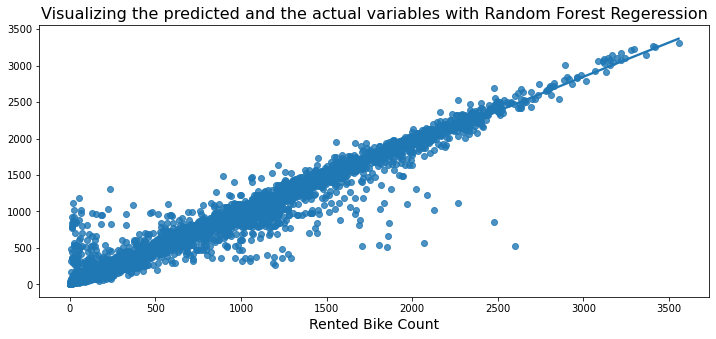

In [75]:
# Ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train*y_train, pred_train*pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

# Random ForestRegressor with GridSearchCV

In [89]:
#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)
#training the model
rf_reg.fit(X_train, y_train)
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score_train= {R2_Score_train}')

MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score_test= {R2_Score_test}')

MSE= 7.548469131956553
RMSE= 2.747447748721812
R2_Score_train= 0.9509809996888273
MSE= 19.900384576287564
RMSE= 4.460984709264039
R2_Score_test= 0.8740214111679199


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


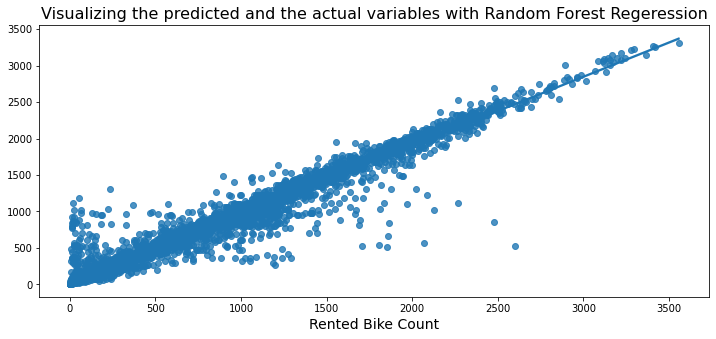

In [90]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train*y_train, pred_train*pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

# **Gradient Boosting Regressor with GridSearchCV**

In [76]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [77]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [78]:
# Importing Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV

In [79]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

In [80]:
fgb_model= gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

In [81]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [82]:
gb_optimal_model = gb_grid.best_estimator_

In [83]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [84]:
# Making predictions on train and test data
y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [85]:
r2_score(y_train, y_pred_train_g_g)

0.9106108001677612

In [86]:
gradient=r2_score(y_test, y_pred_g_g)
gradient

0.8693948922872439

Text(0.5, 0, 'Actual Values')

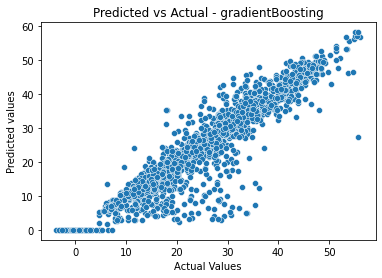

In [87]:
# Visualiz the predictions
sns.scatterplot(x=y_pred_g_g,y=y_test)
plt.title('Predicted vs Actual - gradientBoosting')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# **Compersion of different modle R2 value:**

In [88]:
models= ['Lasso_model','Ridge_model','Random forest','Gradient Boosting','DecisionTree','elasticnet']
R2_value= [r2_lr,r2_ridge_test,R2_Score_test,gradient,DT_with_cv,r2_e]
compare_models = pd.DataFrame([R2_value],columns=models,index =['r2_value'])
compare_models

,Lasso_model,Ridge_model,Random forest,Gradient Boosting,elasticnet
r2_value,0.603011,0.614894,0.874021,0.869395,0.601472


Random forest and Gradient Boosting is best moldel for this data as per experiment.

# **Conclusion**

*   Hour of the day holds most importance among all the features for prediction of dataset.
*   It is observed that highest number bike rentals counts in Autumn/fall Summer Seasons and the lowest in Spring season.
*   We observed that the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day.
*   As we can see the top 5 important features of our dataset are: Season_winter, Temperature, Hour, Season_autumn and Humidity.
*   Peoples do not use rented bikes in no functioning day.
*   People tend to rent bikes when the temperature is between -5 to 25 degrees.
*   People tend to rent bikes when the visibility is between 300 to 1700.
*   The above experiments we can conclude that gradient boosting  and random forest regressor with using hyperparameters we got the best results.